## The Final Battle
I am presenting here what I believe might be useful to those who seek shelter, after suffering the wrath of the Last Battle in King's Landing. The city that represents hopes, safety and a promising future, is known in the highest of the mountains and the lowest of the valleys, across the great seas and goes by the name , <b>New York City</b>. 

_Note: The following lines also represent my work in the capstone project's final stage through the course. Enjoy!_ ;p

In [2]:
#Let's download some of the libraries before-hand for faster code generation.

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:.2f}'.format)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries have been imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries have been imported.


Let's download the dataset of New York City's boroughs and neighbourhoods.

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


Now we will read the json data through json.load()

In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Let's take a look at the first entry in the features key, where the details about the neighbourhood such as the geometry, location, borough name are stored.

In [5]:
newyork_data['features'][0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [6]:
#Storing all the data features in a new variable
neighborhoods_data = newyork_data['features']

In [7]:
#Let's add the neighbourhoods and their data in the dataframe
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.89,-73.85
1,Bronx,Co-op City,40.87,-73.83
2,Bronx,Eastchester,40.89,-73.83
3,Bronx,Fieldston,40.90,-73.91
4,Bronx,Riverdale,40.89,-73.91


In [10]:
print("The datafame has {} neighborhoods that all fall under one of the {} boroughs.".format(
    neighborhoods.shape[0], len(neighborhoods['Borough'].unique())))

The datafame has 306 neighborhoods that all fall under one of the 5 boroughs.


In [11]:
neighborhoods.Borough.unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'], dtype=object)

In [12]:
bo_list = ('Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island')
for borough in bo_list:
    neighborhoods.loc[neighborhoods['Borough'] == borough, 'bo_num'] = bo_list.index(borough)

In [13]:
neighborhoods['bo_num'] = neighborhoods.bo_num.astype(int)

In [15]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude,bo_num
0,Bronx,Wakefield,40.89,-73.85,1
1,Bronx,Co-op City,40.87,-73.83,1
2,Bronx,Eastchester,40.89,-73.83,1
3,Bronx,Fieldston,40.90,-73.91,1
4,Bronx,Riverdale,40.89,-73.91,1


###### Let's see the many places (neighbourhoods) in your dream city where you will be building your new home on the map. 
This will require two things: <br><br>
    1) Getting the *co-ordinate location* of the NY city through the geopy library's geocoder instance.<br>
    2) Using the folium library to display the map

In [16]:
# getting co-ordinates
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [17]:
# creating the map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the Boroughs
bo_no = len(neighborhoods['Borough'].unique())
x = np.arange(bo_no)
ys = [i + x + (i*x)**2 for i in range(bo_no)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# adding neighborto the map
for lat, lng, borough, neighborhood, bo_num in zip(neighborhoods['Latitude'],neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood'], neighborhoods['bo_num']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[bo_num - 1],
        fill=True,
        fill_color=rainbow[bo_num - 1],
        fill_opacity=0.5,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Well that looks like you have got ample of neighborhoods to choose from, in the city, where you can build your home. The red markers show neighborhoods of Staten Island, whilst the green and orange show neighborhoods of Brooklyn and Queens, respectively. The purple markers show all the neighbourhoods of the Bronx area and the blue ones represent the neighborhoods of Manhattan.

However, these are a lot of options to choose from. So let's try to narrow your choice by providing you some budget information about the average sales price in these boroughs.

For this, let's download the data for New York City property sales for around an year from the Kaggle dataset <a href="https://www.kaggle.com/new-york-city/nyc-property-sales#nyc-rolling-sales.csv">'NYC Property Sales - Kaggle'.</a>

In [18]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_da9d2b5400364d0d988f95cbdbe0a67c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='X9XsDMdrskDgMeZVwWnEi-iB2J5Si3LjwFAX176FrJX0',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_da9d2b5400364d0d988f95cbdbe0a67c.get_object(Bucket='thebattleoftheneighborhoods-donotdelete-pr-ki5mwzh88md815',Key='nyc-rolling-sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_nyc_sales = pd.read_csv(body)
df_nyc_sales.head()

,I,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [19]:
df_nyc_sales.shape

(84548, 22)

In [20]:
#Let's clean up the table and keep only relevant information
df_nyc_sales['BOROUGH'] = df_nyc_sales['BOROUGH'] - 1

In [21]:
#Here we are taking only a select columns that provide a comprehensive background for 
# the budget information needed to be added in our dataframe 
df_nyc_sales = df_nyc_sales[['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY', 'TOTAL UNITS','SALE PRICE']]

In [22]:
df_nyc_sales.rename(columns={'BOROUGH':'Borough','NEIGHBORHOOD':'Neighborhood','BUILDING CLASS CATEGORY':'build_category',
                             'TOTAL UNITS':'total_units','SALE PRICE':'sale_price'}, inplace=True)

In [23]:
df_nyc_sales.head(3)

,Borough,Neighborhood,build_category,total_units,sale_price
0,0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,5,6625000
1,0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,31,-
2,0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,17,-


You can see there are certain sale price values here that aren't available in the dataset. 

According to the Kaggle dataset's <a href="https://www.kaggle.com/new-york-city/nyc-property-sales#Description">description</a>, there maybe certain sales that are actually transfers of deeds between different parties: for example parents transferring ownership to their home to a child after moving out for retirement. 

So let's check if there are certain non-sensical values such as <b>'0' units</b> of house sold or a house sold for the price which is <b>'less than a 10000 dollars'</b>, etc. These will be the transactions for those transfer of deeds, which we cannot count as a geniune sale of property. So we will drop all of them here.

In [24]:
df_nyc_sales = df_nyc_sales[df_nyc_sales["sale_price"] != ' -  ']  # for not available sale prices
df_nyc_sales = df_nyc_sales[df_nyc_sales['total_units'] != 0]      # for 0 units houses sold
df_nyc_sales = df_nyc_sales[df_nyc_sales['sale_price'] > '10000']  #for houses which have price less than $10000

In [25]:
#changing datatype for getting average sale prices.
df_nyc_sales = df_nyc_sales.astype({"total_units": int, "sale_price": int})

In [26]:
print(df_nyc_sales.shape)
df_nyc_sales.head()

(42110, 5)


,Borough,Neighborhood,build_category,total_units,sale_price
0,0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,5,6625000
3,0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10,3936272
4,0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6,8000000
6,0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,8,3192840
9,0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,24,16232000


In [27]:
#Grouping the sales transactions by the boroughs and then getting the average sale price for each borough.
nyc_sales_borough = df_nyc_sales.groupby(df_nyc_sales['Borough']).sum()
nyc_sales_borough['avg_sale_price'] = nyc_sales_borough['sale_price'] / nyc_sales_borough['total_units']
nyc_sales_borough.head()

,total_units,sale_price,avg_sale_price
Borough,,,
0,27265,37768901827,1385252.22
1,15892,3777073245,237671.36
2,28346,17510065602,617726.16
3,30879,11765471239,381018.53
4,7900,2918031797,369371.11


In [28]:
#resetting the index for shifting Borough column
nyc_sales_borough.reset_index(inplace=True)

In [29]:
nyc_sales_borough.head()

,Borough,total_units,sale_price,avg_sale_price
0,0,27265,37768901827,1385252.22
1,1,15892,3777073245,237671.36
2,2,28346,17510065602,617726.16
3,3,30879,11765471239,381018.53
4,4,7900,2918031797,369371.11


In [30]:
nyc_sales_borough.rename(columns={'Borough':'bo_num'}, inplace=True)

In [31]:
#Now let's merge this with our neighborhoods dataframe and keep the relevant information.
neighborhoods = pd.merge(neighborhoods,nyc_sales_borough,on='bo_num')
neighborhoods.drop(columns={'total_units','sale_price'}, inplace=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude,bo_num,avg_sale_price
0,Bronx,Wakefield,40.89,-73.85,1,237671.36
1,Bronx,Co-op City,40.87,-73.83,1,237671.36
2,Bronx,Eastchester,40.89,-73.83,1,237671.36
3,Bronx,Fieldston,40.90,-73.91,1,237671.36
4,Bronx,Riverdale,40.89,-73.91,1,237671.36


So here we have in our dataframe <b>*neighborhoods*</b>, the average sale price for the borough, which will give you better understanding of which borough to choose from based on the kind of budget you will prefer.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


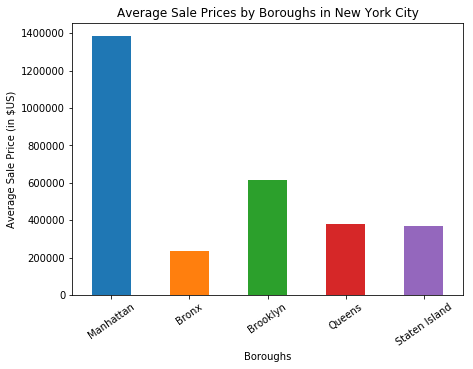

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

df_borough_price = nyc_sales_borough[['bo_num','avg_sale_price']]
df_borough_price['bo_num'] = pd.Series(data = bo_list)
df_borough_price.plot(kind='bar', figsize=(7,5), y = 'avg_sale_price', x = 'bo_num', rot=35, legend=None)

plt.ylabel('Average Sale Price (in $US)')
plt.xlabel('Boroughs')
plt.title('Average Sale Prices by Boroughs in New York City')

plt.show()

Now, on choosing a borough based upon your budget, you would like to choose a very specific neighborhood to stay in. <b>Why?</b> The reason being that you would like to have certain _attractions or spots_ that better suit your style (for example you may like to have café's nearby, or Indian restaurants, and preferably a library). 

So let's say you decided to live in <b> _Queens_ borough</b> (intriguing choice for someone to choose after leaving _King's Landing_). Now to show you the above neighborhood information we will be getting the data of nearby venues and attractions, extract the top venues from the data for every neighborhood, using the Foursquare API.

(Note: We can choose any of the above boroughs and perform similar analysis of the same and present the most probable neighborhood for you.) 

Let's take a closer look at the *'Queens'* borough and visualize it's various neighborhoods.

In [109]:
#Getting the data for Queens borough.
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head()

,Borough,Neighborhood,Latitude,Longitude,bo_num,avg_sale_price
0,Queens,Astoria,40.77,-73.92,3,381018.53
1,Queens,Woodside,40.75,-73.90,3,381018.53
2,Queens,Jackson Heights,40.75,-73.88,3,381018.53
3,Queens,Elmhurst,40.74,-73.88,3,381018.53
4,Queens,Howard Beach,40.65,-73.84,3,381018.53


#### Let's take a step back first.
Getting an average budget information about all the boroughs helps to understand the wider real-estate scenario of New York City. But when we look at individual neighborhoods, an estimate of the average sale price of the neighborhood will go a long way into helping you choose the place where you want to buy the property.

In [110]:
#Getting sale_price based on boroughs and the neighborhoods. 
nycboro_grouped_sales = df_nyc_sales.groupby(['Borough','Neighborhood']).sum()
nycboro_grouped_sales.reset_index(inplace=True)
nycboro_grouped_sales.head()

,Borough,Neighborhood,total_units,sale_price
0,0,ALPHABET CITY,355,327347311
1,0,CHELSEA,597,1867928634
2,0,CHINATOWN,129,183727814
3,0,CIVIC CENTER,307,1961571805
4,0,CLINTON,278,469103673


In [111]:
#Getting the average sale price for each neighborhood.
nycboro_grouped_sales['avg_sale_price'] = nycboro_grouped_sales['sale_price'] / nycboro_grouped_sales['total_units']
nycboro_grouped_sales.head()

,Borough,Neighborhood,total_units,sale_price,avg_sale_price
0,0,ALPHABET CITY,355,327347311,922105.10
1,0,CHELSEA,597,1867928634,3128858.68
2,0,CHINATOWN,129,183727814,1424246.62
3,0,CIVIC CENTER,307,1961571805,6389484.71
4,0,CLINTON,278,469103673,1687423.28


In [112]:
queens_nei_sales = nycboro_grouped_sales[nycboro_grouped_sales['Borough'] == 3]
queens_nei_sales.loc[:,'Neighborhood'] = queens_nei_sales.loc[:,'Neighborhood'].str.lower()
queens_nei_sales.reset_index(drop=True,inplace=True)
print(len(queens_nei_sales))
queens_nei_sales.head(2)

58


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Borough,Neighborhood,total_units,sale_price,avg_sale_price
0,3,airport la guardia,13,4191500,322423.08
1,3,arverne,241,53173924,220638.69


In [113]:
queens_data_2 = pd.DataFrame(data=queens_data)
queens_data_2['Neighborhood'] = queens_data_2['Neighborhood'].str.lower()
queens_data_2.head(2)

,Borough,Neighborhood,Latitude,Longitude,bo_num,avg_sale_price
0,Queens,astoria,40.77,-73.92,3,381018.53
1,Queens,woodside,40.75,-73.90,3,381018.53


In [114]:
queens_data.head(2)

,Borough,Neighborhood,Latitude,Longitude,bo_num,avg_sale_price
0,Queens,astoria,40.77,-73.92,3,381018.53
1,Queens,woodside,40.75,-73.90,3,381018.53


In [115]:
queens_data_add = pd.merge(queens_data_2,queens_nei_sales,on='Neighborhood', how='left')
print(len(queens_data_add))
queens_data_add.tail()

81


,Borough_x,Neighborhood,Latitude,Longitude,bo_num,avg_sale_price_x,Borough_y,total_units,sale_price,avg_sale_price_y
76,Queens,middle village,40.72,-73.88,3,381018.53,3.00,434.00,223157282.00,514187.29
77,Queens,malba,40.79,-73.83,3,381018.53,nan,nan,nan,nan
78,Queens,hammels,40.59,-73.81,3,381018.53,3.00,94.00,29219385.00,310844.52
79,Queens,bayswater,40.61,-73.77,3,381018.53,nan,nan,nan,nan
80,Queens,queensbridge,40.76,-73.95,3,381018.53,nan,nan,nan,nan


In [116]:
#adding the average sale_price of the neighborhoods in the empty values.
queens_data_add['avg_sale_price_y'] = queens_data_add['avg_sale_price_y'].fillna(queens_data_add['avg_sale_price_y'].mean())
queens_data_add.drop(columns={'bo_num','avg_sale_price_x','Borough_y','total_units','sale_price'},inplace=True)
queens_data_add.rename(columns={'Borough_x':'Borough','avg_sale_price_y':'avg_sale_price'},inplace=True)
queens_data_add.head()

,Borough,Neighborhood,Latitude,Longitude,avg_sale_price
0,Queens,astoria,40.77,-73.92,553813.86
1,Queens,woodside,40.75,-73.90,431048.80
2,Queens,jackson heights,40.75,-73.88,263764.55
3,Queens,elmhurst,40.74,-73.88,424212.44
4,Queens,howard beach,40.65,-73.84,413014.52


In [117]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

# All requested packages already installed.

Wordcloud is installed and imported!


In [118]:
stopwords = set(STOPWORDS)

In [119]:
#Normalizing the values for faster wc generation
q_avg_salep = queens_data_add[['Neighborhood','avg_sale_price']]

normalized_avg_saleprice = np.ceil( ((q_avg_salep['avg_sale_price'] - q_avg_salep['avg_sale_price'].min())/(q_avg_salep['avg_sale_price'].max() - q_avg_salep['avg_sale_price'].min()) * 1000))

normalized_avg_saleprice
q_avg_salep['avg_sale_price'] = normalized_avg_saleprice
q_avg_salep = q_avg_salep.astype({"Neighborhood": str, "avg_sale_price": int})
q_avg_salep.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Neighborhood,avg_sale_price
0,astoria,289
1,woodside,223
2,jackson heights,134
3,elmhurst,220
4,howard beach,214


In [120]:
q_avg_salep.avg_sale_price.sum()

19335

In [121]:
wc_string = ""
for n,asp in zip(q_avg_salep['Neighborhood'],q_avg_salep['avg_sale_price']):
    inner_string = str(n)
    wc_string = wc_string + " ".join([inner_string]*(asp))

In [122]:
# instantiate a word cloud object
queens_nei_wc = WordCloud(
    background_color='white',
    max_words=50000,
    stopwords=stopwords
)

# generate the word cloud
queens_nei_wc.generate(wc_string)

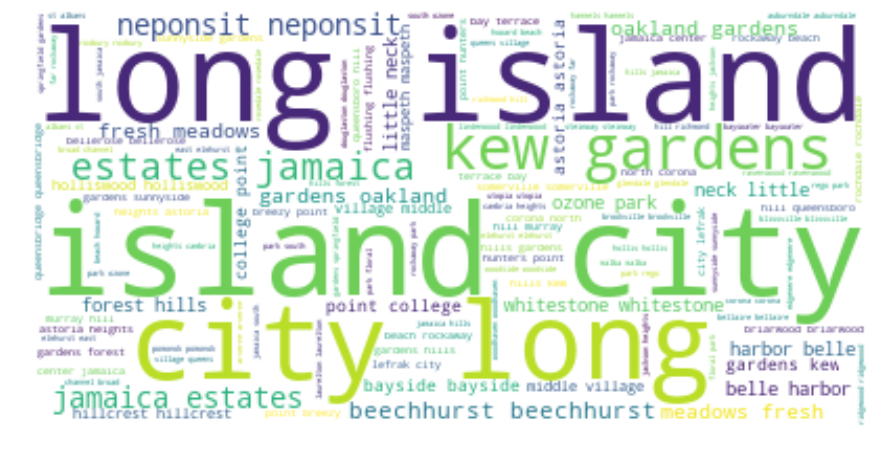

In [123]:
# set the figure for the word cloud
fig = plt.figure()
fig.set_figwidth(15) # set width
fig.set_figheight(15) # set height

# display the cloud
plt.imshow(queens_nei_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Based on the word cloud here, you can take an assessment of the average sale price for the neighborhoods of Queens, and accordingly make an informed decision whether to choose from the places with larger budget(based on size and frequency of the words in the word cloud) or not.

Meanwhile, let's visualize these places on the map, and see if we can find other insigts based on it.

In [126]:
#Getting the data for Queens borough.
queens_data = neighborhoods[neighborhoods['Borough'] == 'Queens'].reset_index(drop=True)
queens_data.head(2)

,Borough,Neighborhood,Latitude,Longitude,bo_num,avg_sale_price
0,Queens,Astoria,40.77,-73.92,3,381018.53
1,Queens,Woodside,40.75,-73.90,3,381018.53


In [128]:
queens_data_add['Neighborhood'] = queens_data['Neighborhood'] 
queens_data_add.head(2)

In [130]:
#getting geographical coordinates of Queens.
address = 'Queens, NY'

geolocator = Nominatim(user_agent="nyc_explore")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The latitude and longitude of Queens are {}, {}.'.format(latitude, longitude))

The latitude and longitude of Queens are 40.6524927, -73.7914214158161.


In [131]:
# create map of Manhattan using latitude and longitude values
map_queens = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood, borough in zip(queens_data['Latitude'], queens_data['Longitude'], queens_data['Neighborhood'],queens_data['Borough']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#33a532',
        fill_opacity=0.7,
        parse_html=False).add_to(map_queens)  
    
map_queens

As said earlier, let's get some venue information using Foursquare API to further gain more information about the neighborhood you would like to live in.

In [132]:
#Adding Foursquare API credentials for usage
CLIENT_ID = 'OY0UZG00FP4BC4KXBFPHP0JMFSLFDPJ3LACAU51YMYUXAHR4' # your Foursquare ID
CLIENT_SECRET = 'CNBX3QRZDMRPW5GFKYV1EXC45GYB3VKVSWGNV0VSOYXOUGA2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OY0UZG00FP4BC4KXBFPHP0JMFSLFDPJ3LACAU51YMYUXAHR4
CLIENT_SECRET:CNBX3QRZDMRPW5GFKYV1EXC45GYB3VKVSWGNV0VSOYXOUGA2


In [133]:
import requests
LIMIT=100

#Creating a function to get a number of venues for various neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [134]:
queens_venues = getNearbyVenues(names=queens_data['Neighborhood'],
                               latitudes=queens_data['Latitude'],
                               longitudes=queens_data['Longitude'])

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [135]:
queens_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.77,-73.92,Favela Grill,40.77,-73.92,Brazilian Restaurant
1,Astoria,40.77,-73.92,Orange Blossom,40.77,-73.92,Gourmet Shop
2,Astoria,40.77,-73.92,Titan Foods Inc.,40.77,-73.92,Gourmet Shop
3,Astoria,40.77,-73.92,CrossFit Queens,40.77,-73.92,Gym
4,Astoria,40.77,-73.92,Off The Hook,40.77,-73.92,Seafood Restaurant


In [138]:
print(queens_venues.shape)
queens_venues.head()

(2147, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.77,-73.92,Favela Grill,40.77,-73.92,Brazilian Restaurant
1,Astoria,40.77,-73.92,Orange Blossom,40.77,-73.92,Gourmet Shop
2,Astoria,40.77,-73.92,Titan Foods Inc.,40.77,-73.92,Gourmet Shop
3,Astoria,40.77,-73.92,CrossFit Queens,40.77,-73.92,Gym
4,Astoria,40.77,-73.92,Off The Hook,40.77,-73.92,Seafood Restaurant


In [139]:
#Checking number of venues that have been returned for each neighborhoods.
queens_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,17,17,17,17,17,17
Astoria,100,100,100,100,100,100
Astoria Heights,14,14,14,14,14,14
Auburndale,21,21,21,21,21,21
Bay Terrace,41,41,41,41,41,41
Bayside,71,71,71,71,71,71
Bayswater,3,3,3,3,3,3
Beechhurst,18,18,18,18,18,18
Bellaire,11,11,11,11,11,11


In [142]:
print('There are {} types of venue categories in the borough of Queens .'.format(len(queens_venues['Venue Category'].unique())))

There are 262 types of venue categories in the borough of Queens .


Let's ananlyze the neighborhoods based on these categories around which you will develop and comapare your interests.

In [144]:
# one hot encoding of all venue category types
queens_onehotcoded = pd.get_dummies(queens_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
queens_onehotcoded['Neighborhood'] = queens_venues['Neighborhood'] 

# move neighborhood column to the first column
cols = list(queens_onehotcoded)
cols.insert(0, cols.pop(cols.index('Neighborhood')))
queens_onehotcoded = queens_onehotcoded.loc[:, cols]

queens_onehotcoded.head()

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Astoria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Now let's get the frequnency of these venue categories across the neighborhoods.

In [145]:
queens_venue_grouped = queens_onehotcoded.groupby('Neighborhood').mean().reset_index()
queens_venue_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Arverne,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.0

In [146]:
queens_venue_grouped.shape

(81, 262)

In [154]:
queens_grouped = pd.merge(queens_venue_grouped,queens_data_add,on='Neighborhood')
cols = list(queens_grouped)
cols.insert(0, cols.pop(cols.index('Neighborhood')))
cols.insert(1, cols.pop(cols.index('Latitude')))
cols.insert(2, cols.pop(cols.index('Longitude')))
cols.insert(3, cols.pop(cols.index('avg_sale_price')))
queens_grouped = queens_grouped.loc[:, cols]
queens_grouped.drop(columns={'Borough'},inplace=True)

In [173]:
#Got the dataframe for clustering
queens_grouped.head()

,Neighborhood,Latitude,Longitude,avg_sale_price,Accessories Store,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bike Trail,Bistro,Board Shop,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Moving Target,Multiplex,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool Hall,Post Office,Pub,Ramen Restaurant,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Romanian Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,State / Provincial Park,Steakhouse,Strip Club,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Arverne,40.59,-73.79,220638.69,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [174]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [175]:
#Creating a new dataframe and storing the top 3 venues of the place along with the neighborhood
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = queens_venue_grouped['Neighborhood']

for ind in np.arange(queens_venue_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(queens_venue_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Arverne,Surf Spot,Metro Station,Playground
1,Astoria,Middle Eastern Restaurant,Bar,Hookah Bar
2,Astoria Heights,Italian Restaurant,Bowling Alley,Music Venue
3,Auburndale,Italian Restaurant,Ice Cream Shop,Bar
4,Bay Terrace,Clothing Store,Women's Store,Donut Shop


In [176]:
queens_venues_data = pd.merge(queens_data,neighborhoods_venues_sorted,on='Neighborhood')

In [177]:
queens_venues_data.drop(columns={'bo_num','avg_sale_price'}, inplace=True)
queens_venues_data.head()

,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Queens,Astoria,40.77,-73.92,Middle Eastern Restaurant,Bar,Hookah Bar
1,Queens,Woodside,40.75,-73.90,Grocery Store,Bakery,Thai Restaurant
2,Queens,Jackson Heights,40.75,-73.88,Latin American Restaurant,Peruvian Restaurant,South American Restaurant
3,Queens,Elmhurst,40.74,-73.88,Thai Restaurant,Mexican Restaurant,Chinese Restaurant
4,Queens,Howard Beach,40.65,-73.84,Italian Restaurant,Fast Food Restaurant,Pharmacy


#### One more step closer.
So we now have with us the top 3 venues in every neighborhood in Queens. This helps us into clustering the neighborhoods into clusters that have similar characteristics. Provides more intution into which area should we buy the new home, away from home.

In [192]:
# set number of clusters
kclusters = 6

queens_clustering= queens_grouped.drop('Neighborhood',1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(queens_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 4, 0, 0, 0, 4, 0, 2, 0, 4], dtype=int32)

In [193]:
# add clustering labels
queens_venues_data.
queens_venues_data.insert(0, 'Cluster', kmeans.labels_)
queens_venues_data.head()

,Cluster,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,3,Queens,Astoria,40.77,-73.92,Middle Eastern Restaurant,Bar,Hookah Bar
1,4,Queens,Woodside,40.75,-73.90,Grocery Store,Bakery,Thai Restaurant
2,0,Queens,Jackson Heights,40.75,-73.88,Latin American Restaurant,Peruvian Restaurant,South American Restaurant
3,0,Queens,Elmhurst,40.74,-73.88,Thai Restaurant,Mexican Restaurant,Chinese Restaurant
4,0,Queens,Howard Beach,40.65,-73.84,Italian Restaurant,Fast Food Restaurant,Pharmacy


In [194]:
# create map of Queens Borough.

map_queens_borough = folium.Map(location=[latitude, longitude], zoom_start=11)

# representing clusters using color map
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# adding clusters as markers to the map
markers_colors = []
for lat, lon, poi, cluster, ven1, ven2, ven3 in zip(queens_venues_data['Latitude'], queens_venues_data['Longitude'], queens_venues_data['Neighborhood'], queens_venues_data['Cluster'], queens_venues_data['1st Most Common Venue'],queens_venues_data['2nd Most Common Venue'],queens_venues_data['3rd Most Common Venue']):
    top3str = ven1 + ', ' + ven2 + ', ' + ven3
    label = folium.Popup(str(poi) + ' is famous for : ' + str(top3str), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.0).add_to(map_queens_borough)
       
map_queens_borough

## Finally...
We reached the destination of our journey. The above map clearly details out the different neighborhoods of the <b>_QUEENS_</b> borough. These neighborhoods are labelled into different clusters based on the types of venues located inside these neighborhoods and their frequency. 

This gives you knowledge about the most popular venues that you will find in and around these neighborhoods. So go through all the different neighborhoods, try to see what suits your lifestyle and pick a neighborhood where you would love to be. 

My help here is done. Have fun choosing your dream home, in the city of dreams, the NEW YORK CITY!.